In [11]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

In [12]:
X_data = np.genfromtxt(r'x.csv',delimiter=',')
n = len(X_data)

In [13]:
def initializer(K):
    pi = np.random.randint(low=1, high=10, size=K)
    pi = pi/pi.sum()
    theta = np.random.rand(K)
    return pi, theta

In [14]:
def ML_EM(X_data, K):
    n = len(X_data)
    # Initialize pi, theta
    pi, theta = initializer(K)
    LML = []       #list for log marginal likelihood
    T = 50         # iterations
    for t in range(T):
# E Step
        phi_ij = np.zeros((n,K))
        for i in range(n):
            for j in range(K):
                phi_ij[i][j] = pi[j] * binom.pmf(X_data[i], 20, theta[j])
        for i in range(n):
            phi_ij[i, :] = phi_ij[i, :] / np.sum(phi_ij[i, :])

# M Step
        nj = np.sum(phi_ij, axis=0)
        for j in range(K):
            theta[j] = 1 / (20 * nj[j]) * np.dot(X_data.T, phi_ij[:, j])
            pi[j] = nj[j] / n
# Calculate log marginal likelihood
        ft = 0
        for i in range(n):
            temp = 0
            for j in range(K):
                temp = temp + pi[j] * binom.pmf(X_data[i], 20, theta[j])
            ft += np.log(temp)
#         print(ft)
        LML.append(ft)
    return phi_ij, LML

Text(0, 0.5, 'log marginal likelihood')

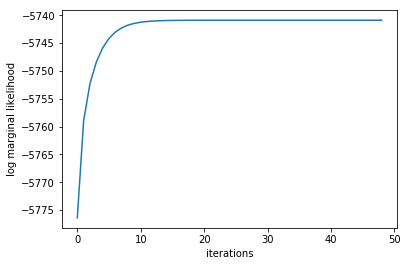

In [15]:
phi_ij1,ft1 = ML_EM(X_data,3)
#ft1,phi_ij1 = MLEM(3)
plt.plot(range(49),ft1[1:])
plt.xlabel('iterations')
plt.ylabel('log marginal likelihood')

In [16]:
list01 = []
for i in phi_ij1:
    list01.append(np.argmax(i))
phi_ij1

array([[3.29317519e-09, 9.97531603e-01, 2.46839364e-03],
       [9.97904657e-01, 5.88299839e-10, 2.09534267e-03],
       [9.66190703e-01, 1.93057700e-07, 3.38091038e-02],
       ...,
       [1.79222547e-10, 9.99451603e-01, 5.48396439e-04],
       [1.79222547e-10, 9.99451603e-01, 5.48396439e-04],
       [9.91501111e-01, 1.07611871e-08, 8.49887831e-03]])

Text(0, 0.5, 'The most probable cluster')

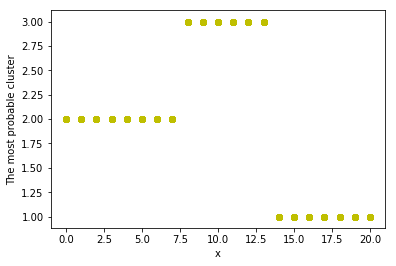

In [17]:
plt.scatter(X_data,np.array(list01)+1,c='y', label='Scatter')
#plt.legend()
plt.xlabel('x')
plt.ylabel('The most probable cluster')

In [18]:
phi_ij2,ft2 = ML_EM(X_data,9)

array([[4.32833991e-02, 2.25351733e-01, 6.72346492e-10, ...,
        9.12545397e-02, 1.41154042e-01, 1.59403992e-09],
       [1.10670065e-11, 3.98420295e-10, 3.26588832e-01, ...,
        2.90332022e-11, 8.91441201e-11, 4.25714188e-01],
       [4.09226530e-09, 1.11765477e-07, 2.95591660e-01, ...,
        1.04055943e-08, 2.89686105e-08, 4.19683333e-01],
       ...,
       [4.59833186e-02, 2.08524053e-01, 3.53387115e-11, ...,
        9.54448716e-02, 1.40579808e-01, 8.74406014e-11],
       [4.59833186e-02, 2.08524053e-01, 3.53387115e-11, ...,
        9.54448716e-02, 1.40579808e-01, 8.74406014e-11],
       [2.14962820e-10, 6.74048182e-09, 3.13843494e-01, ...,
        5.55197232e-10, 1.62321692e-09, 4.26959126e-01]])

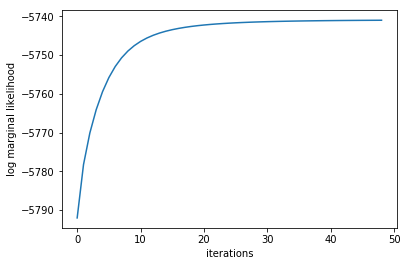

In [19]:
plt.plot(range(49),ft2[1:])
plt.xlabel('iterations')
plt.ylabel('log marginal likelihood')
phi_ij2

In [22]:
list02 = []
phi_ij2 = phi_ij2.T
for i in phi_ij2:
    list02.append(np.argmax(i))

Text(0, 0.5, 'The most probable cluster')

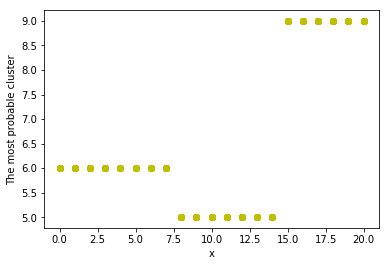

In [23]:
plt.scatter(X_data,np.array(list02)+1,c='y', label='Scatter')
#plt.legend()
plt.xlabel('x')
plt.ylabel('The most probable cluster')

In [24]:
phi_ij3,ft3 = ML_EM(X_data,15)

In [27]:
list03 = []
phi_ij3 = phi_ij3.T
for i in phi_ij3:
    list03.append(np.argmax(i))

Text(0, 0.5, 'The most probable cluster')

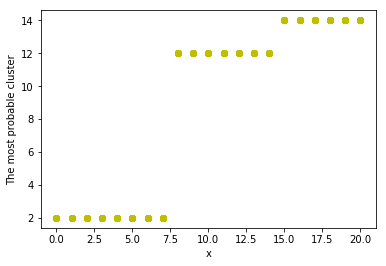

In [28]:
plt.scatter(X_data,np.array(list03)+1,c='y', label='Scatter')
#plt.legend()
plt.xlabel('x')
plt.ylabel('The most probable cluster')

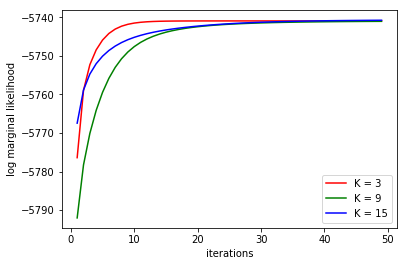

In [29]:
plt.plot(range(1,50),ft1[1:], 'r', label = 'K = 3')
plt.plot(range(1,50),ft2[1:], 'g', label = 'K = 9')
plt.plot(range(1,50),ft3[1:], 'b', label = 'K = 15')
plt.xlabel('iterations')
plt.ylabel('log marginal likelihood')
plt.legend()